In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('../Data/fmi_weather_and_price.csv')
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

column_statistics = df.agg(['mean', 'median', 'std'])

print(column_statistics)

# Some base descriptive statistics for the fmi_weather_and_price dataset

# Mean, median and standard deviation values for each column

            Wind      Temp      Price
mean    4.269243  5.483564   9.962229
median  4.071951  5.611500   6.094600
std     1.398702  9.212295  11.747785


Correlation between Wind and Price: -0.02
Correlation between Temp and Price: 0.15


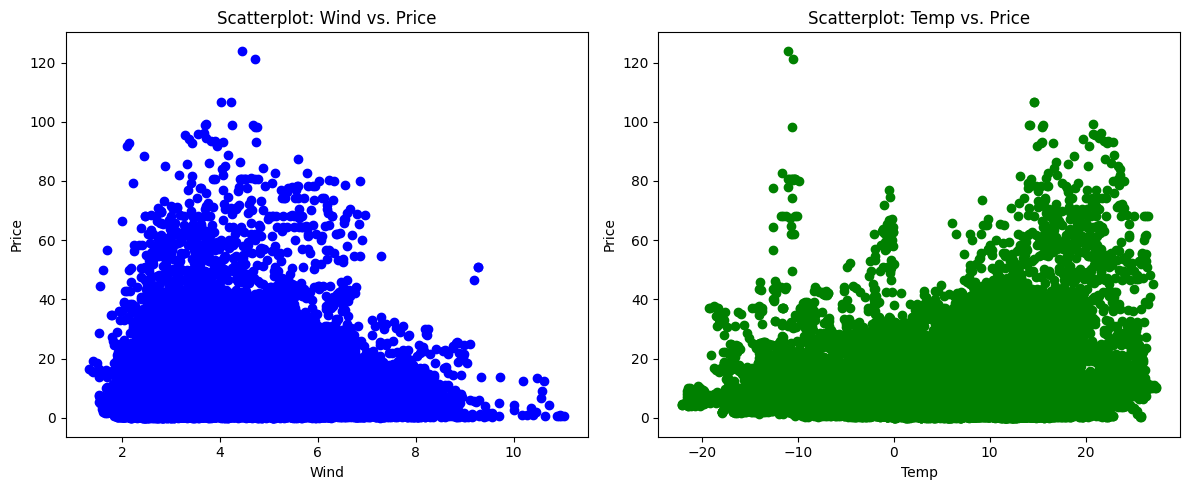

In [2]:




# Using the pearson method of correlation to calculate the standard correlation coefficient
# For wind and temp
wind_price_corr = df['Wind'].corr(df['Price'])
temp_price_corr = df['Temp'].corr(df['Price'])

# The .corr function takes the pearson coefficient as the default method


print(f'Correlation between Wind and Price: {wind_price_corr:.2f}')
print(f'Correlation between Temp and Price: {temp_price_corr:.2f}')
# Outcomes are as follows, -0.02 for Wind and Price 
# 0.15 for Temp and Price (both rounded to 2 decimals for clarity)
# With the pearson correlation, negative values interpret negative linear correlation, 
# positive values a positive correlation, and 0 no correlation.
# As seen, the correlation values are close to 0, with little correlation either way
# A small positive correlation between Temp and Price is seen, at a value of 0.15


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=df['Wind'], y=df['Price'], color='b')
plt.title('Scatterplot: Wind vs. Price')
plt.xlabel('Wind')
plt.ylabel('Price')

plt.subplot(1, 2, 2)
plt.scatter(x=df['Temp'], y=df['Price'], color='g')
plt.title('Scatterplot: Temp vs. Price')
plt.xlabel('Temp')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


In [3]:
# Shifting the data to account the prices being estimated a day before
# By shifting the 'Price' data by a day, we can see a slight difference in the correlations
# For each day, and presented below

print(df.corr('pearson'))
print('-------------------------------------')
print(df.corr('spearman'))
print('-------------------------------------')
print(df.corr('kendall'))
print('-------------------------------------')
df['Price'] = df['Price'].shift(-1)

print(df.corr('pearson'))
spearman_corr = df.corr('spearman')
# The difference between the adjusted data and the estimated data is negligiable, and therefor the data
# can be left as provided, without the need to adjust it.




           Wind      Temp     Price
Wind   1.000000 -0.077010 -0.021841
Temp  -0.077010  1.000000  0.147867
Price -0.021841  0.147867  1.000000
-------------------------------------
           Wind      Temp     Price
Wind   1.000000 -0.091950 -0.014201
Temp  -0.091950  1.000000  0.091493
Price -0.014201  0.091493  1.000000
-------------------------------------
           Wind      Temp     Price
Wind   1.000000 -0.060813 -0.009361
Temp  -0.060813  1.000000  0.057896
Price -0.009361  0.057896  1.000000
-------------------------------------
           Wind      Temp     Price
Wind   1.000000 -0.077010 -0.022136
Temp  -0.077010  1.000000  0.146422
Price -0.022136  0.146422  1.000000


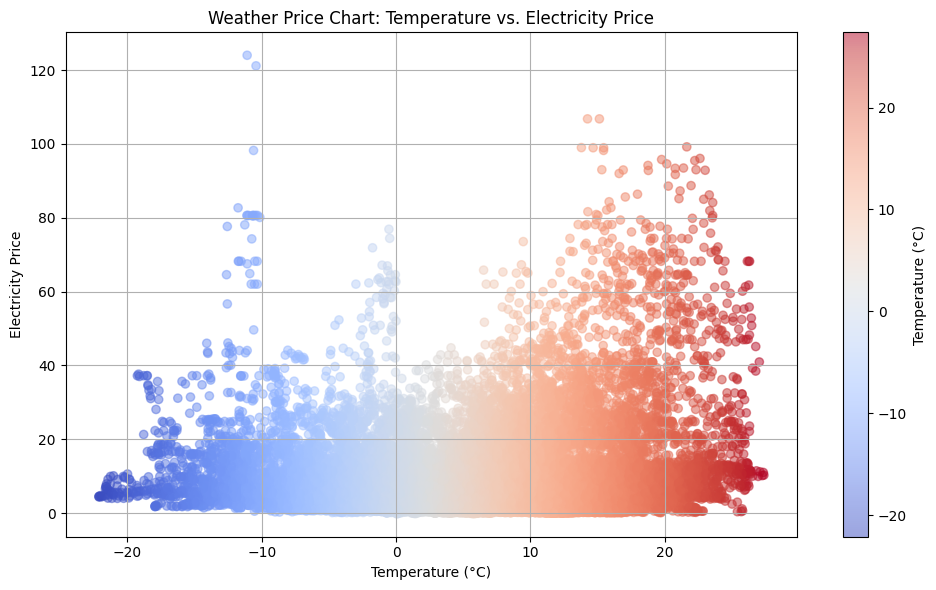

In [4]:
# Extract the 'Temp' and 'Price' columns
temperature = df['Temp']
price = df['Price']

# Create a scatterplot with temperature on the x-axis and price on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(temperature, price, c=temperature, cmap='coolwarm', alpha=0.5, marker='o')
cbar = plt.colorbar()
cbar.set_label('Temperature (°C)')

# Add labels and a title
plt.xlabel('Temperature (°C)')
plt.ylabel('Electricity Price')
plt.title('Weather Price Chart: Temperature vs. Electricity Price')

plt.grid(True)
plt.tight_layout()
plt.show()

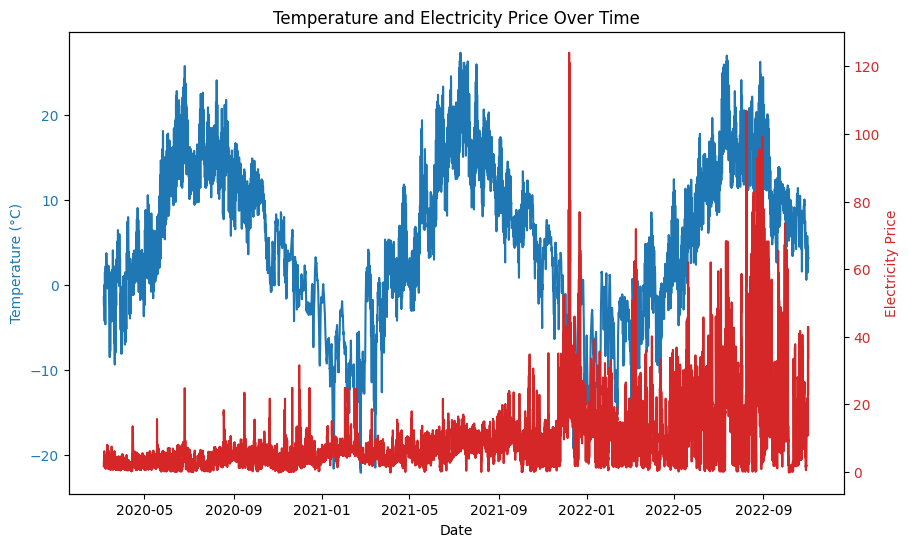

In [5]:
df = pd.read_csv('../Data/fmi_weather_and_price.csv')

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°C)', color='tab:blue')
ax1.plot(df.index, df['Temp'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Electricity Price', color='tab:red')
ax2.plot(df.index, df['Price'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Temperature and Electricity Price Over Time')
plt.show()

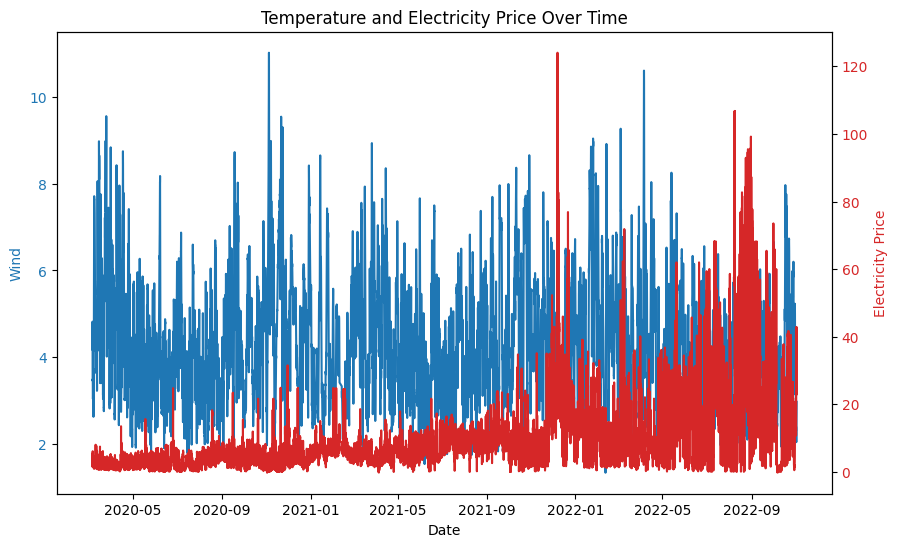

In [6]:
df = pd.read_csv('../Data/fmi_weather_and_price.csv')

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Create a line plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_xlabel('Date')
ax1.set_ylabel('Wind', color='tab:blue')
ax1.plot(df.index, df['Wind'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Electricity Price', color='tab:red')
ax2.plot(df.index, df['Price'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Temperature and Electricity Price Over Time')
plt.show()